In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [3]:
import os

train_dir = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train"
train_paths = [os.path.join(train_dir, filename) for filename in os.listdir(train_dir)]

In [4]:
print("Total files found:", len(train_paths))
print(train_paths[:10])  # Print first 10 file paths for debugging

Total files found: 2
['/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels', '/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/images']


In [5]:
import os

# Define dataset root directory
dataset_path = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format"

# Define paths for train and validation sets
train_images_path = os.path.join(dataset_path, "train/images")
train_labels_path = os.path.join(dataset_path, "train/labels")

valid_images_path = os.path.join(dataset_path, "valid/images")
valid_labels_path = os.path.join(dataset_path, "valid/labels")

# Verify paths exist
print("Train Images:", os.listdir(train_images_path)[:5])  # Show first 5 images
print("Train Labels:", os.listdir(train_labels_path)[:5])  # Show first 5 label files
print("Validation Images:", os.listdir(valid_images_path)[:5])
print("Validation Labels:", os.listdir(valid_labels_path)[:5])


Train Images: ['-166.28119160162683,-164.90931076178953,39.24040892601955,40.61228976585686.png', '132.78883148290637,134.16071232274365,10.430911289436077,11.802792129273378.png', '-60.64636693415408,-59.274486094316764,-44.44432230405624,-43.07244146421894.png', '-179.99999999999991,-178.6281191601626,-49.93184566340548,-48.55996482356818.png', '-125.12476640650756,-123.75288556667027,31.00912388699569,32.381004726833.png']
Train Labels: ['25.78212597559634,27.154006815433643,-17.006705507310105,-15.634824667472792.txt', '66.93855117071558,68.31043201055287,18.662196328459927,20.03407716829723.txt', '97.11992964713636,98.49181048697369,-17.006705507310105,-15.634824667472792.txt', '-151.1905023634164,-149.8186215235791,7.687149609761457,9.05903044959876.txt', '-37.324392656919855,-34.58063097724523,69.42178740244033,70.79366824227765.txt']
Validation Images: ['147.8795207211168,149.25140156095404,3.571507090249538,4.94338793008684.png', '-52.41508189513022,-51.04320105529294,22.77783

In [6]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def visualize_images_with_bboxes(image_dir, label_dir, num_images=5, img_size=(12, 12)):
    """
    Visualizes images with and without bounding boxes.

    Parameters:
    - image_dir (str): Path to the folder containing images.
    - label_dir (str): Path to the folder containing YOLO label files.
    - num_images (int): Number of images to visualize (default: 5).
    - img_size (tuple): Size of the displayed images (default: (12,12)).
    """
    # Get list of image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Randomly select images
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    def draw_bboxes(image_path, label_path):
        """Draws bounding boxes on the image based on YOLO labels."""
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        h, w, _ = img.shape  # Get image dimensions

        bbox_count = 0  # Count bounding boxes

        try:
            with open(label_path, "r") as file:
                lines = file.readlines()

            for line in lines:
                values = line.strip().split()
                class_id = int(values[0])  # Get class ID
                x_center, y_center, box_w, box_h = map(float, values[1:])

                # Convert YOLO format to pixel values
                x1 = int((x_center - box_w / 2) * w)
                y1 = int((y_center - box_h / 2) * h)
                x2 = int((x_center + box_w / 2) * w)
                y2 = int((y_center + box_h / 2) * h)

                # Draw rectangle
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                bbox_count += 1  # Increment count
        except:
            print(f"Warning: No label file found for {image_path}")

        return img, bbox_count

    # Display images
    plt.figure(figsize=img_size)
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))

        # Load images
        img_original = cv2.imread(img_path)
        img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img_with_bboxes, bbox_count = draw_bboxes(img_path, label_path)

        # Show original image
        plt.subplot(num_images, 2, i * 2 + 1)
        plt.imshow(img_original)
        plt.axis("off")
        plt.title("Original")

        # Show image with bounding boxes
        plt.subplot(num_images, 2, i * 2 + 2)
        plt.imshow(img_with_bboxes)
        plt.axis("off")
        plt.title(f"With Bounding Boxes ({bbox_count} Craters)")

    plt.tight_layout()
    plt.show()



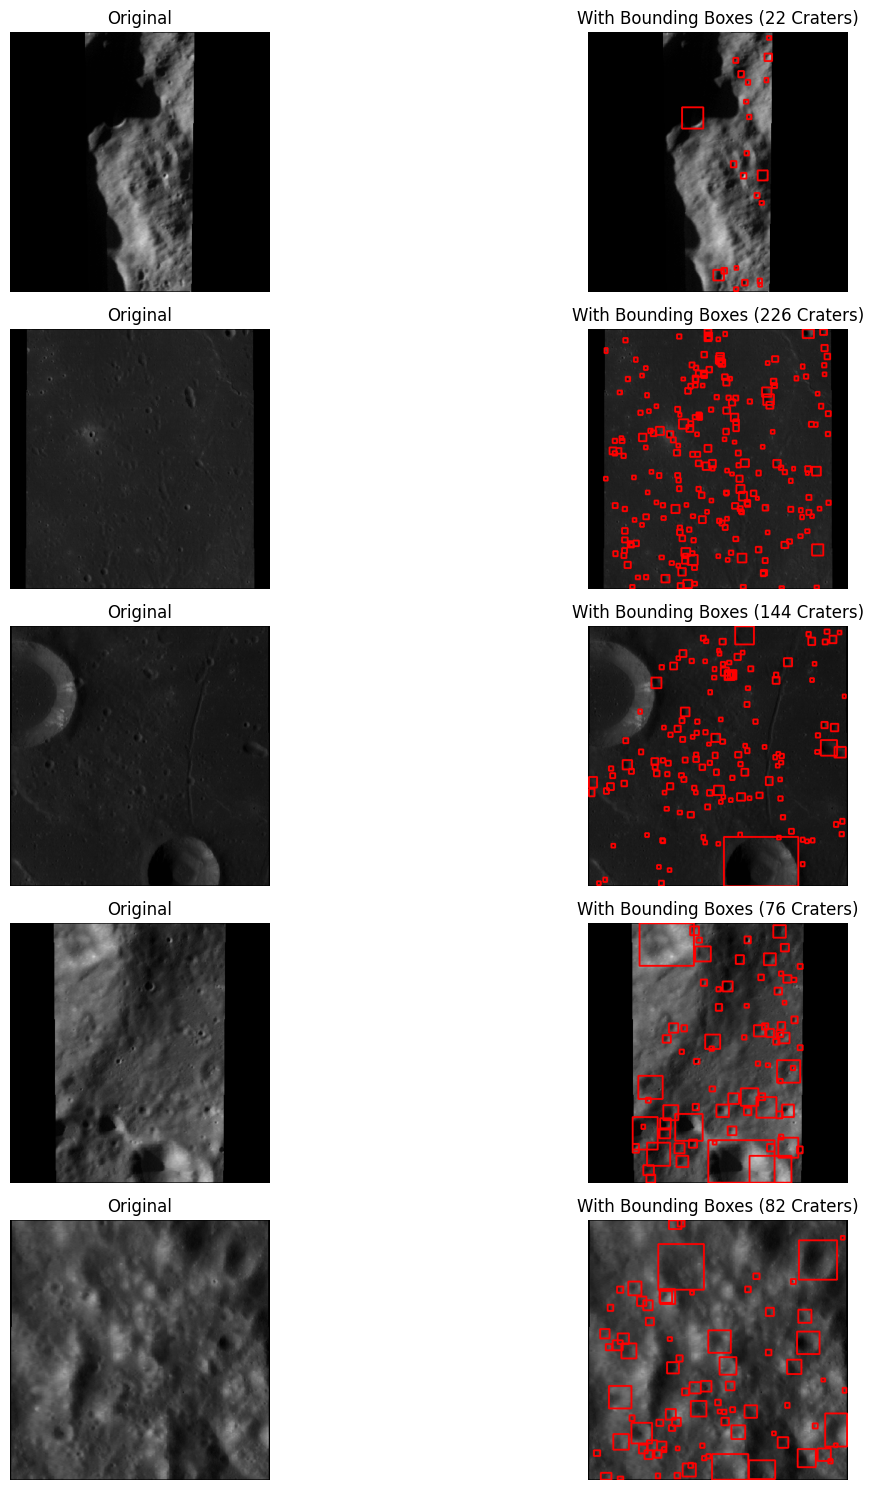

In [7]:
image_dir = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/images"
label_dir = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels"
visualize_images_with_bboxes(image_dir, label_dir, num_images=5, img_size=(15, 15))

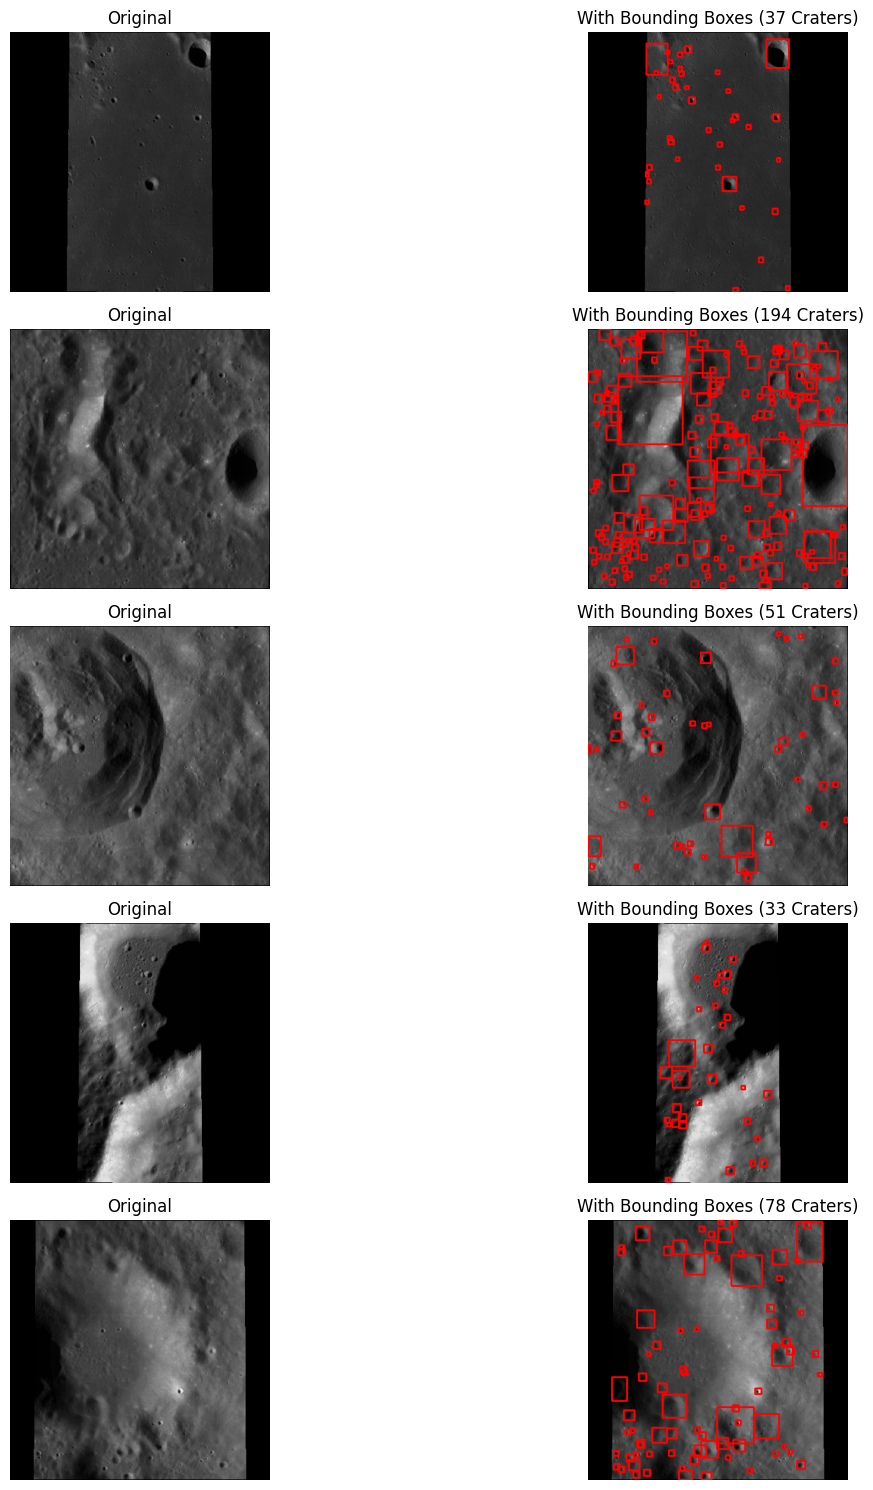

In [8]:
image_dir = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid/images"
label_dir = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid/labels"
visualize_images_with_bboxes(image_dir, label_dir, num_images=5, img_size=(15, 15))

In [9]:
import os

def count_images(train_path, val_path):
    """
    Counts the number of images in the train and validation directories.

    Args:
        train_path (str): Path to the training images directory.
        val_path (str): Path to the validation images directory.

    Returns:
        dict: Dictionary with counts of train and validation images.
    """
    train_images = [f for f in os.listdir(train_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    val_images = [f for f in os.listdir(val_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    return {
        "train_images": len(train_images),
        "val_images": len(val_images)
    }

# Example usage
train_images_path = r"/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/images"
val_images_path = r"/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid/images"

image_counts = count_images(train_images_path, val_images_path)
print(f"Number of Train Images: {image_counts['train_images']}")
print(f"Number of Validation Images: {image_counts['val_images']}")


Number of Train Images: 8756
Number of Validation Images: 1545


In [10]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 18.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
model = YOLO("yolov8s.pt")

In [13]:
!ls /kaggle/input/lu3m6tgt


LU3M6TGT_yolo_format


In [14]:
# import yaml
# import shutil

# # Define paths
# original_yaml_path = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/data.yaml"  # Read-only
# new_yaml_path = "/kaggle/working/data.yaml"  # Writable

# # Copy file to writable directory
# shutil.copy(original_yaml_path, new_yaml_path)

# # Load and modify the YAML file
# with open(new_yaml_path, 'r') as file:
#     data = yaml.safe_load(file)

# # Modify values (Example changes)
# data['train'] = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train"
# data['val'] = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid"
# data['nc'] = 1 # Modify the number of classes
# data['names'] = ['crater']  # Update class names

# # Save changes in the writable directory
# with open(new_yaml_path, 'w') as file:
#     yaml.dump(data, file, default_flow_style=False)

# print("Updated data.yaml successfully!")


In [15]:
with open("/kaggle/input/data-yaml/data.yaml", "r") as f:
    print(f.read())


train: /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/images
val: /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid/images
nc: 1
names: ['crater']



In [17]:

model.train(
    data="/kaggle/input/data-yaml/data.yaml",
    epochs=30,  
    imgsz=640,
    batch=4,
    iou=0.3,
    verbose=True,
    device='cuda',
    save = True,
    save_period = 5
)


Ultralytics 8.3.100 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/data-yaml/data.yaml, epochs=30, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=5, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.3, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 17.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels... 8756 images, 121 backgrounds, 0 corrupt: 100%|██████████| 8756/8756 [00:42<00:00, 204.83it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid/labels... 1545 images, 19 backgrounds, 0 corrupt: 100%|██████████| 1545/1545 [00:08<00:00, 191.51it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.08G       1.28       1.01      0.948        673        640: 100%|██████████| 2189/2189 [03:50<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:25<00:00,  7.47it/s]


                   all       1545     171392      0.726      0.701      0.786      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.16G     0.9874     0.7694     0.8679        718        640: 100%|██████████| 2189/2189 [03:40<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.02it/s]


                   all       1545     171392      0.818       0.78      0.873      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.16G     0.9223     0.7149     0.8546        778        640: 100%|██████████| 2189/2189 [03:39<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  7.95it/s]


                   all       1545     171392      0.811      0.776      0.869      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.16G     0.8906     0.6931     0.8498        601        640: 100%|██████████| 2189/2189 [03:37<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.01it/s]


                   all       1545     171392      0.823      0.788      0.878      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.16G     0.8682     0.6712     0.8451        303        640: 100%|██████████| 2189/2189 [03:37<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  7.94it/s]


                   all       1545     171392      0.794      0.794      0.865      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.16G     0.8653     0.6737     0.8458        332        640: 100%|██████████| 2189/2189 [03:37<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.05it/s]


                   all       1545     171392      0.826      0.801      0.888      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.16G     0.8288     0.6352     0.8389        518        640: 100%|██████████| 2189/2189 [03:38<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.01it/s]


                   all       1545     171392      0.768      0.773      0.846      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.16G     0.8095     0.6283     0.8371        200        640: 100%|██████████| 2189/2189 [03:38<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.02it/s]


                   all       1545     171392      0.823      0.807       0.89      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.16G     0.7983     0.6125     0.8348        399        640: 100%|██████████| 2189/2189 [03:38<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  7.97it/s]


                   all       1545     171392       0.81      0.797      0.879      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.16G     0.7958     0.6194     0.8349        635        640: 100%|██████████| 2189/2189 [03:38<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.00it/s]


                   all       1545     171392      0.824      0.817      0.895      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.16G     0.7827      0.598     0.8328        202        640: 100%|██████████| 2189/2189 [03:37<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  7.97it/s]


                   all       1545     171392      0.829      0.814      0.896      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.16G     0.7682     0.5907     0.8312        720        640: 100%|██████████| 2189/2189 [03:38<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  7.97it/s]


                   all       1545     171392      0.819      0.814      0.891      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.16G     0.7602     0.5816     0.8302        974        640: 100%|██████████| 2189/2189 [03:37<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.07it/s]


                   all       1545     171392      0.841      0.833      0.909      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.16G     0.7534      0.576     0.8289        682        640: 100%|██████████| 2189/2189 [03:37<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.14it/s]


                   all       1545     171392      0.836      0.829      0.904      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.16G     0.7445     0.5703     0.8272        449        640: 100%|██████████| 2189/2189 [03:36<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.20it/s]


                   all       1545     171392      0.818      0.815      0.892      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.16G     0.7388     0.5663     0.8272        504        640: 100%|██████████| 2189/2189 [03:37<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.00it/s]


                   all       1545     171392      0.853       0.84      0.915      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.16G     0.7331      0.558     0.8258        865        640: 100%|██████████| 2189/2189 [03:38<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.03it/s]


                   all       1545     171392      0.856      0.842      0.917      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.16G     0.7251     0.5537     0.8252        354        640: 100%|██████████| 2189/2189 [03:36<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.16it/s]


                   all       1545     171392      0.851      0.834      0.913      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.16G     0.7178     0.5461     0.8243       1104        640: 100%|██████████| 2189/2189 [03:36<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.09it/s]


                   all       1545     171392      0.837      0.833      0.906      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.16G      0.714     0.5426      0.823        537        640: 100%|██████████| 2189/2189 [03:36<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.16it/s]


                   all       1545     171392      0.838      0.836      0.907      0.775
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.16G     0.6907     0.5417     0.8177        380        640: 100%|██████████| 2189/2189 [03:25<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.10it/s]


                   all       1545     171392      0.877      0.853      0.931      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.16G     0.6792     0.5267     0.8162        488        640: 100%|██████████| 2189/2189 [03:25<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.08it/s]


                   all       1545     171392      0.871      0.857       0.93      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.16G     0.6629      0.513     0.8145        370        640: 100%|██████████| 2189/2189 [03:24<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.10it/s]


                   all       1545     171392      0.874      0.856       0.93      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.16G     0.6573     0.5061     0.8132        484        640: 100%|██████████| 2189/2189 [03:26<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.03it/s]


                   all       1545     171392      0.863      0.852      0.925      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.16G     0.6552     0.5036     0.8124        492        640: 100%|██████████| 2189/2189 [03:25<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.19it/s]


                   all       1545     171392      0.882      0.859      0.934      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.16G     0.6446     0.4943     0.8116        289        640: 100%|██████████| 2189/2189 [03:24<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.10it/s]


                   all       1545     171392      0.886      0.862      0.937      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.16G     0.6404     0.4901     0.8112        515        640: 100%|██████████| 2189/2189 [03:25<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.11it/s]


                   all       1545     171392      0.882      0.863      0.936      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.16G      0.632     0.4821     0.8099        312        640: 100%|██████████| 2189/2189 [03:27<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:24<00:00,  8.08it/s]


                   all       1545     171392      0.878      0.861      0.934      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.16G     0.6274     0.4766     0.8096        142        640: 100%|██████████| 2189/2189 [03:24<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.11it/s]


                   all       1545     171392      0.885      0.864      0.937      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.16G      0.622     0.4722     0.8084        402        640: 100%|██████████| 2189/2189 [03:24<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:23<00:00,  8.19it/s]


                   all       1545     171392       0.89      0.864      0.939      0.811

30 epochs completed in 1.993 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:49<00:00,  3.93it/s]


                   all       1545     171392       0.89      0.864      0.939      0.811


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 6.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7da4f66dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [20]:
model.val()

Ultralytics 8.3.100 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid/labels... 1545 images, 19 backgrounds, 0 corrupt: 100%|██████████| 1545/1545 [00:02<00:00, 653.14it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 387/387 [00:48<00:00,  7.96it/s]


                   all       1545     171392       0.89      0.864      0.939      0.829


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 9.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train44


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7d2fd03ac0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 